### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2023 Semester 2

## Assignment 1

**Student Name:**    `Zimo Peng`

**Student ID:**     `1143743`


This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a written report explaining your results at the **Assignment 1** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 0. Laplacian pyramid compression
You can use the code below to check how much a quantized Laplacian pyramid representation compresses an image.

In [2]:
imSize = 256 # image height/width (assume image is square)
bitsPerLevel = [2,3,4,5,6,7,8] # bits used to encode each level of pyramid

# Image size before compression, in bits (assume uint8 grayscale)
sizeUncompressed = 8 * imSize * imSize
print('Uncompressed size = '+str(sizeUncompressed)+' bits')

# Image size after compression, in bits
sizeCompressed = 0
for i in range(len(bitsPerLevel)):
    sizeCompressed = sizeCompressed + (bitsPerLevel[i]*(imSize/(pow(2,i)))*(imSize/(pow(2,i))))
print('Compressed size = '+str(sizeCompressed)+' bits')

print(str(round(100*sizeCompressed/sizeUncompressed))+'% of original')

Uncompressed size = 524288 bits
Compressed size = 203840.0 bits
39% of original


### 1. Laplacian image pyramid

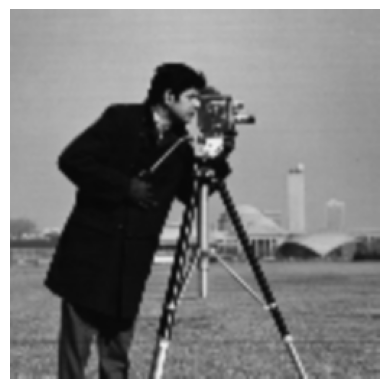

(256, 256, 3)


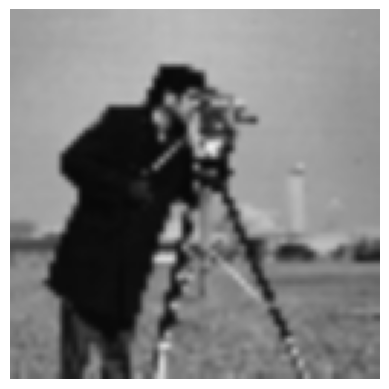

(128, 128, 3)


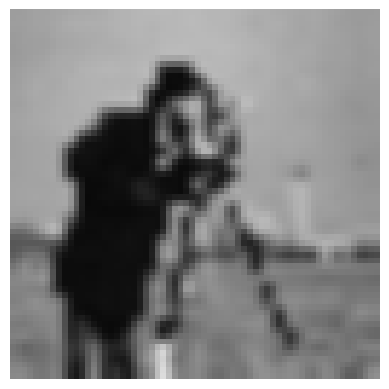

(64, 64, 3)


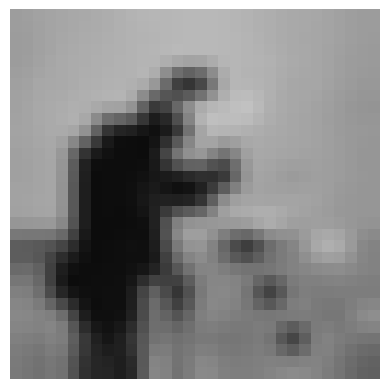

(32, 32, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(64, 64, 3)
(128, 128, 3)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 64 and the array at index 1 has size 128

In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import os

# Define the filter kernel
kernel = (1/256)*np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, 36, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]])

camera_man = './'
camera_img = cv2.imread(os.path.join(camera_man, "cameraman.png"))
camera_img = cv2.cvtColor(camera_img,cv2.COLOR_BGR2RGB)

        
layers = dict()


def laplacian_pyramid(n, camera_img, kernel):
    size = 0
    for i in range(n):
        if (i < n - 1):
            filtered = cv2.filter2D(src=camera_img, kernel=kernel, ddepth=-1)
            down_new_img = np.array([downsample(camera_img[0])])
            count = 1
            for i in camera_img[1:]:
                if count % 2 == 0:
                    down_new_img = np.append(down_new_img, [downsample(i)], axis = 0)
                count += 1
            up_new_img = np.array([upsample(down_new_img[0])])
            array_size=(camera_img.shape[0],3)
            up_new_img = np.append(up_new_img, [np.full(array_size, 0)], axis = 0)
            count = 1
            for i in down_new_img[1:]:
                up_new_img = np.append(up_new_img, [upsample(i)], axis = 0)
                up_new_img = np.append(up_new_img, [np.full(array_size, 0)], axis = 0)
            img = np.array(up_new_img, np.uint8)
            filtered_u = cv2.filter2D(src=img, kernel=4*kernel, ddepth = -1)
            plt.imshow(filtered_u)
            plt.axis('off')
            plt.show()
            layers[size] = filtered - filtered_u
            print(layers[size].shape)
            size += 1
            camera_img = down_new_img
        else:
            layers[size] = filtered
    return layers

def recreation(layers):
    size = len(layers)
    img = layers[size-2]
    for i in layers.values():
        print(i.shape)
    print(img.shape)
    for i in range(size-2)[::-1]:
        up_new_img = np.array([upsample(img[0])])
        print(layers[i].shape)
        array_size=(layers[i].shape[0],3)
        up_new_img = np.append(up_new_img, [np.full(array_size, 0)], axis = 0)
        for j in img[1:]:
            up_new_img = np.append(up_new_img, [upsample(j)], axis = 0)
            up_new_img = np.append(up_new_img, [np.full(array_size, 0)], axis = 0)
        up_new_img = np.array(up_new_img, np.uint8)
        filtered_u = cv2.filter2D(src=up_new_img, kernel=4*kernel, ddepth = -1)
        up_new_img = filtered_u + layers[i]
    return up_new_img
            
def downsample(dim_list):  
    new_img = np.array([dim_list[0]])
    count = 1
    for i in (dim_list)[1:]:
        if ((count % 2) == 0):
            new_img = np.append(new_img, [i], axis = 0)
        count += 1
    return new_img

def upsample(dim_list):
    new_img = np.array([dim_list[0]])
    new_img = np.append(new_img, [[0,0,0]], axis = 0)
    for i in dim_list[1:]:
        new_img = np.append(new_img, [i], axis = 0)
        new_img = np.append(new_img, [[0,0,0]], axis = 0)
    return new_img


pyramid = laplacian_pyramid(5, camera_img, kernel)
img = recreation(pyramid)

### 2. Quantization and compression

### 3. Evaluation in the frequency domain